In [20]:
import pandas as pd
import matplotlib.pyplot as plt

##### Load <code>story_categories_v1.csv</code>

In [6]:
df_story_cat = pd.read_csv("../data/cleaned_data/story_categories_v1.csv")
df_story_cat.head()

,story_id,generic_category_id,basic_category_id,difficulty_id
0,5,2,NaN,NaN
1,6,2,NaN,NaN
2,7,2,NaN,NaN
3,8,2,NaN,NaN
4,9,2,NaN,NaN


In [7]:
df_story_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19772 entries, 0 to 19771
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   story_id             19772 non-null  int64  
 1   generic_category_id  19772 non-null  int64  
 2   basic_category_id    1761 non-null   float64
 3   difficulty_id        6541 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 618.0 KB


##### Load <code>story_theme_category_v1.csv</code>

In [3]:
df_story_theme_cat = pd.read_csv("../data/cleaned_data/story_theme_category_v1.csv")
df_story_theme_cat.head()

,story_id,basic_category_id
0,5,1
1,5,3
2,6,1
3,6,3
4,7,1


In [5]:
df_story_theme_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49445 entries, 0 to 49444
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   story_id           49445 non-null  int64
 1   basic_category_id  49445 non-null  int64
dtypes: int64(2)
memory usage: 772.7 KB


##### Load <code>basic_categories_v1.csv</code>

In [4]:
df_basic_categories = pd.read_csv("../data/cleaned_data/basic_categories_v1.csv") 
df_basic_categories.head()

,basic_category_id,generic_category_id,basic_category_name
0,0,0,Directions
1,1,0,Introduction
2,2,0,Closure
3,0,1,Shopping
4,1,1,Gastronomy-Restaurant


In [9]:
df_story_theme_cat = df_story_theme_cat.merge(df_story_cat[['story_id', 'generic_category_id']], on='story_id', how='left')

df_story_theme_cat = df_story_theme_cat.merge(df_basic_categories, on=['generic_category_id', 'basic_category_id'], how='left')

df_story_theme_cat.head()

,story_id,basic_category_id,generic_category_id,basic_category_name
0,5,1,2,Architecture
1,5,3,2,Art
2,6,1,2,Architecture
3,6,3,2,Art
4,7,1,2,Architecture


In [10]:
df_story_theme_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49445 entries, 0 to 49444
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   story_id             49445 non-null  int64 
 1   basic_category_id    49445 non-null  int64 
 2   generic_category_id  49445 non-null  int64 
 3   basic_category_name  49445 non-null  object
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


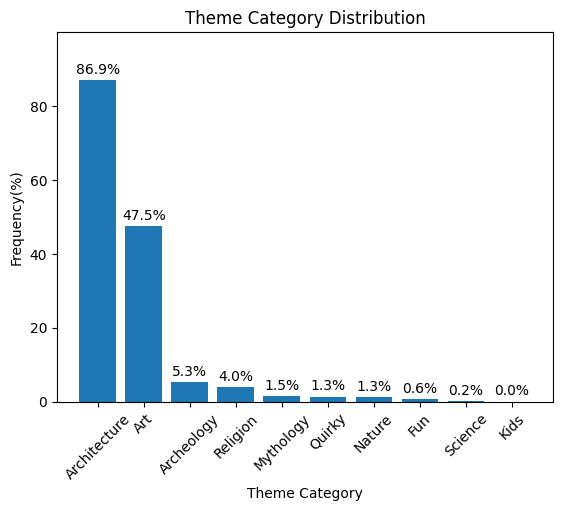

In [27]:
theme_cat_freq = (df_story_theme_cat.groupby('basic_category_name')['story_id'].nunique() / df_story_theme_cat['story_id'].nunique() * 100) \
                        .reset_index(name='frequency') \
                        .sort_values(by='frequency', ascending=False)

theme_cat_freq['frequency'] = round(theme_cat_freq['frequency'], 2)

bars = plt.bar(theme_cat_freq['basic_category_name'], theme_cat_freq['frequency'])
plt.xlabel("Theme Category")
plt.ylabel("Frequency(%)")
plt.title("Theme Category Distribution")
plt.xticks(rotation=45)

# Add percentage labels above bars
for bar, pct in zip(bars, theme_cat_freq["frequency"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,  # +1 to lift above bar
             f"{pct:.1f}%", ha='center', va='bottom')

plt.ylim(0, max(theme_cat_freq["frequency"]) * 1.15)  # Extra space above bars
plt.show()
plt.show()

### 📌 Theme Category Selection for `item_features` Matrix

To build an effective `item_features` matrix for the LightFM model, we filter theme categories based on their frequency in the dataset to avoid feature sparsity and improve model generalization.

#### ✅ Included Categories (Frequency ≥ 2%):
- **Architecture** (86.94%)
- **Art** (47.50%)
- **Archeology** (5.27%)
- **Religion** (3.98%)

These categories are common enough to provide meaningful signal to the model.

#### ⚠️ Rare Categories (Frequency < 2%):
- Mythology (1.48%)
- Quirky (1.30%)
- Nature (1.28%)
- Fun (0.64%)
- Science (0.19%)
- Kids (0.02%)

These rare categories will be grouped into a single feature: **`Theme_Other`**.  
This grouping helps reduce noise, avoids overfitting, and keeps the feature matrix compact.

By applying this threshold-based filtering and grouping strategy, we ensure that the LightFM model learns from informative and well-represented item features.

In [28]:
df_tips = df_story_cat[df_story_cat['generic_category_id'] == 1]
df_tips.head()

,story_id,generic_category_id,basic_category_id,difficulty_id
1585,2156,1,NaN,NaN
1807,2414,1,NaN,NaN
2662,3411,1,NaN,NaN
2894,3779,1,NaN,NaN
2939,3826,1,NaN,NaN


In [29]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1037 entries, 1585 to 19758
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   story_id             1037 non-null   int64  
 1   generic_category_id  1037 non-null   int64  
 2   basic_category_id    257 non-null    float64
 3   difficulty_id        511 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 40.5 KB


In [30]:
df_tips = df_tips.merge(df_basic_categories, on=['generic_category_id', 'basic_category_id'], how='left')
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   story_id             1037 non-null   int64  
 1   generic_category_id  1037 non-null   int64  
 2   basic_category_id    257 non-null    float64
 3   difficulty_id        511 non-null    float64
 4   basic_category_name  257 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 40.6+ KB


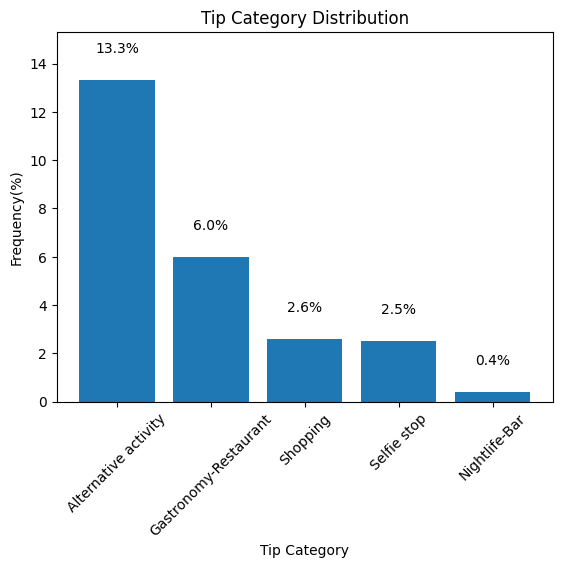

In [31]:
tip_cat_freq = (df_tips.groupby('basic_category_name')['story_id'].nunique() / df_tips['story_id'].nunique() * 100) \
                        .reset_index(name='frequency') \
                        .sort_values(by='frequency', ascending=False)

tip_cat_freq['frequency'] = round(tip_cat_freq['frequency'], 2)

bars = plt.bar(tip_cat_freq['basic_category_name'], tip_cat_freq['frequency'])
plt.xlabel("Tip Category")
plt.ylabel("Frequency(%)")
plt.title("Tip Category Distribution")
plt.xticks(rotation=45)

# Add percentage labels above bars
for bar, pct in zip(bars, tip_cat_freq["frequency"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,  # +1 to lift above bar
             f"{pct:.1f}%", ha='center', va='bottom')

plt.ylim(0, max(tip_cat_freq["frequency"]) * 1.15)  # Extra space above bars
plt.show()
plt.show()

### 📌 Tip Category Selection for `item_features` Matrix

The `tip_basic_category` is available for only 25% of tip stories. To keep the `item_features` matrix informative yet compact:

- We include **tip categories with frequency ≥ 2%**:
  - Alternative activity (13.31%)
  - Gastronomy-Restaurant (5.98%)
  - Shopping (2.60%)
  - Selfie stop (2.51%)

- The **rare category** `Nightlife-Bar (0.39%)` and **missing values** are grouped into a single category: **`Tip_Other`**

This approach avoids noise from sparse features while preserving useful distinctions across the majority of tip stories.